#**Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.**

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have **poor performance on, the minority class,** although typically it is **performance on the minority class that is most important.**

One approach to addressing imbalanced datasets is **to oversample the minority class.** The simplest approach involves **duplicating examples in the minority class,** although these **examples don’t add any new information to the model.** Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

#**After completing this tutorial, you will know:**

##How the SMOTE synthesizes new examples for the minority class.
##How to correctly fit and evaluate machine learning models on SMOTE-transformed training datasets.
##How to use extensions of the SMOTE that generate synthetic examples along the class decision boundary.

#**Synthetic Minority Oversampling Technique**
A **problem** with imbalanced classification is that there are **too few examples** of the **minority class** for a model to **effectively learn the decision boundary.**

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply **duplicating examples from the minority class in the training dataset prior to fitting a model.** This can **balance** the class distribution but **does not** provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by **selecting examples that are close in the feature space,** drawing a line between the examples in the feature space and **drawing a new sample** at a point along that line.

##Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

##**SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.**

In [1]:
!pip install imbalanced-learn

In [2]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


# we can use the make_classification() scikit-learn function to create a synthetic binary classification dataset with 10,000 examples and a 1:100 class distribution.

(10000, 2)
(10000,)
Counter({0: 9900, 1: 100})


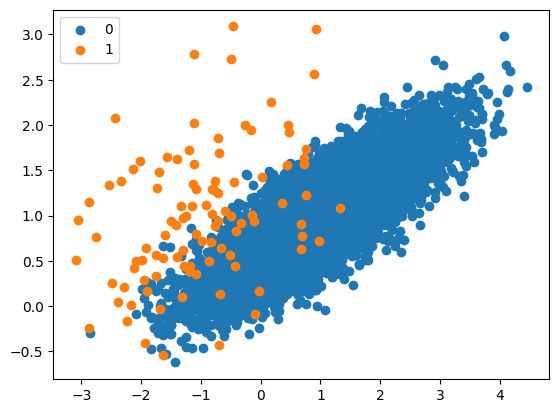

In [15]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
print(X.shape)
print(y.shape)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [14]:
y

array([0, 0, 0, ..., 1, 1, 1])

###Next, we can oversample the minority class using SMOTE and plot the transformed dataset.

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

For example, we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


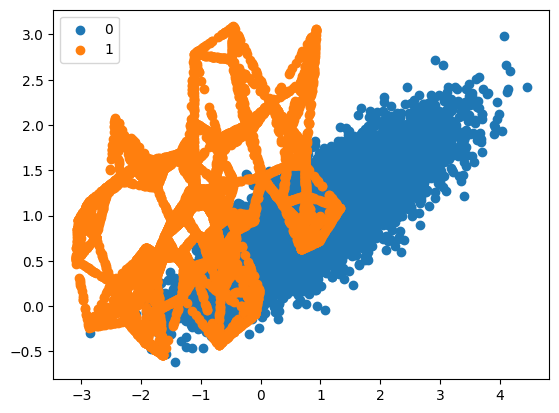

In [4]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#Once transformed, we can summarize the class distribution of the new transformed dataset,
#which would expect to now be balanced through the creation of many new synthetic examples in the minority class.

# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Running the example first creates the dataset and summarizes the class distribution, showing the 1:100 ratio.

##Then the dataset is transformed using the SMOTE and the new class distribution is summarized, **showing a balanced distribution now with 9,900 examples in the minority class.**

##**Finally, a scatter plot of the transformed dataset is created.**

###**It shows many more examples in the minority class created along the lines between the original examples in the minority class.**

#The original paper on SMOTE suggested combining **SMOTE with random undersampling of the majority class.**

The imbalanced-learn library supports random undersampling via the **RandomUnderSampler class.**

We can update the example to **first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).**

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes;

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


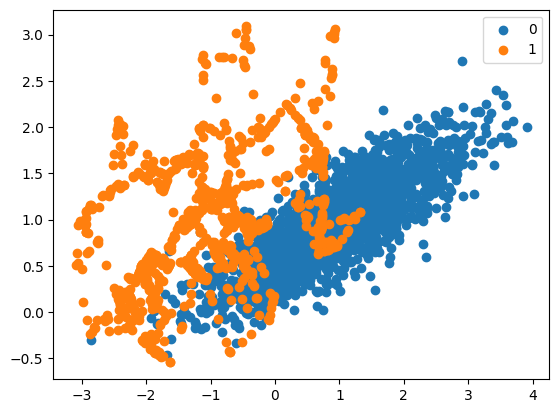

In [5]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# summarize class distribution
counter = Counter(y)
print(counter)


# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
#We can then chain these two transforms together into a Pipeline.
#The Pipeline can then be applied to a dataset, performing each transformation in turn and
#returning a final dataset with the accumulation of the transform applied to it,
#in this case oversampling followed by undersampling.

# transform the dataset
X, y = pipeline.fit_resample(X, y)
#We would expect some SMOTE oversampling of the minority class,
#although not as much as before where the dataset was balanced.
#We also expect fewer examples in the majority class via random undersampling.

# summarize the new class distribution
counter = Counter(y)
print(counter)


# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##first creates the dataset and summarizes the class distribution.

###Next, the dataset is transformed, **first by oversampling the minority class, then undersampling the majority class.** The final class distribution after this sequence of transforms matches our expectations with a 1:2 ratio or about 2,000 examples in the majority class and about 1,000 examples in the minority class.

In [6]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#First, we use our binary classification dataset from the previous section then fit and evaluate **a decision tree algorithm.**

###The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use **repeated stratified k-fold cross-validation** to evaluate the model. We will use **three repeats of 10-fold cross-validation,** meaning that **10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.**

###The dataset is stratified, meaning that each fold of the cross-validation split will have the same class distribution as the original dataset, in this case, a 1:100 ratio. We will evaluate the model using the **ROC area under curve (AUC) metric.** This can be optimistic for severely imbalanced datasets but will still show a relative change with better performing models.

In [7]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# define model
model = DecisionTreeClassifier()


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.772


#Now, we can try the same model and the same evaluation method, although use a SMOTE transformed version of the dataset.

###The correct application of **oversampling during k-fold cross-validation** is to apply the method to the training dataset only, then evaluate the model on the **stratified but non-transformed test set.**

##This can be achieved by defining a **Pipeline that first transforms the training dataset with SMOTE then fits the model.**

In [8]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.824


#As mentioned in the paper, it is believed that SMOTE performs **better when combined with undersampling of the majority class,** such as random undersampling.

###We can achieve this by simply adding a **RandomUnderSampler step to the Pipeline.**

###As in the previous section, we will first oversample the minority class with SMOTE to about a 1:10 ratio, then undersample the majority class to achieve about a 1:2 ratio.

In [9]:
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.848


#Another area to explore would be **to test different values of the k-nearest neighbors selected** in the SMOTE procedure when each new synthetic example is created. **The default is k=5,** although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

###For example, we could **grid search a range of values of k, such as values from 1 to 7,** and evaluate the pipeline for each value.

In [10]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.820
> k=2, Mean ROC AUC: 0.835
> k=3, Mean ROC AUC: 0.838
> k=4, Mean ROC AUC: 0.851
> k=5, Mean ROC AUC: 0.843
> k=6, Mean ROC AUC: 0.848
> k=7, Mean ROC AUC: 0.854


###Running the example will perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by random undersampling and fitting a decision tree on the resulting training dataset.

The mean ROC AUC is reported for each configuration.


In this case, the results suggest that a k=3 might be good with a ROC AUC of about 0.84, and k=7 might also be good with a ROC AUC of about 0.85.

###This highlights that **both the amount of oversampling and undersampling performed (sampling_strategy argument) and the number of examples selected from which a partner is chosen to create a synthetic example (k_neighbors) may be important parameters to select and tune for your dataset.**

#**Borderline-SMOTE**
##A popular extension to SMOTE involves **selecting those instances of the minority class that are misclassified,** such as with a **k-nearest neighbor classification model.**

##We can then **oversample just those difficult instances,** providing more resolution only where it may be required.

###These examples that are **misclassified are likely ambiguous and in a region of the edge or border of decision boundary where class membership may overlap.** As such, this modified to SMOTE is called Borderline-SMOTE and was proposed by Hui Han, et al. in their 2005 paper titled “Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning.”

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


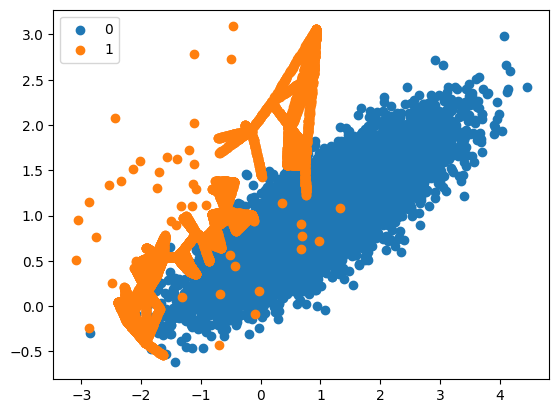

In [11]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Finally, a scatter plot of the transformed dataset is created. The plot clearly shows the effect of the selective approach to oversampling. **Examples along the decision boundary of the minority class are oversampled intently (orange).**

###The plot shows that those examples **far from the decision boundary are not oversampled.** This includes both examples that are easier to classify (those orange points toward the top left of the plot) and those that are overwhelmingly difficult to classify given the strong class overlap (those orange points toward the bottom right of the plot).

#**Borderline-SMOTE SVM**
##Hien Nguyen, et al. suggest using an alternative of Borderline-SMOTE where an **SVM algorithm is used instead of a KNN** to identify misclassified examples on the decision boundary.

###Their approach is summarized in the 2009 paper titled “Borderline Over-sampling For Imbalanced Data Classification.” An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority class that close to the support vectors become the focus for generating synthetic examples.

###… the borderline area is approximated by the support vectors obtained after training a standard SVMs classifier on the original training set. New instances will be randomly created along the lines joining each minority class support vector with a number of its nearest neighbors using the interpolation

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


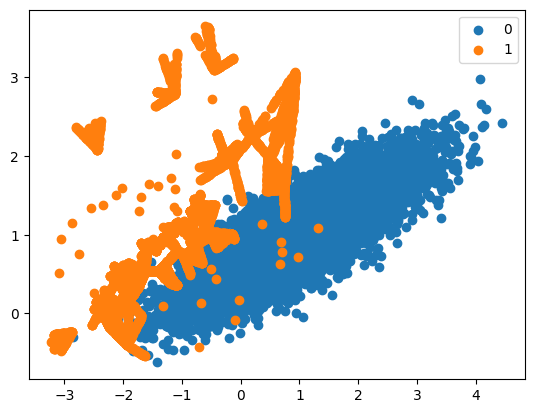

In [12]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###A scatter plot of the dataset is created showing the directed oversampling along the decision boundary with the majority class.

###We can also see that unlike Borderline-SMOTE, more examples are synthesized away from the region of class overlap, such as toward the top left of the plot.

#**Adaptive Synthetic Sampling (ADASYN)**
###Another approach involves generating synthetic samples **inversely proportional to the density of the examples in the minority class.**

###That is, **generate more synthetic examples in regions of the feature space where the density of minority examples is low,** and **fewer or none where the density is high.**

###This modification to SMOTE is referred to as the Adaptive Synthetic Sampling Method, or ADASYN, and was proposed to Haibo He, et al. in their 2008 paper named for the method titled “ADASYN: Adaptive Synthetic Sampling Approach For Imbalanced Learning.”

###ADASYN is based on the idea of adaptively generating minority data samples according to their distributions: more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


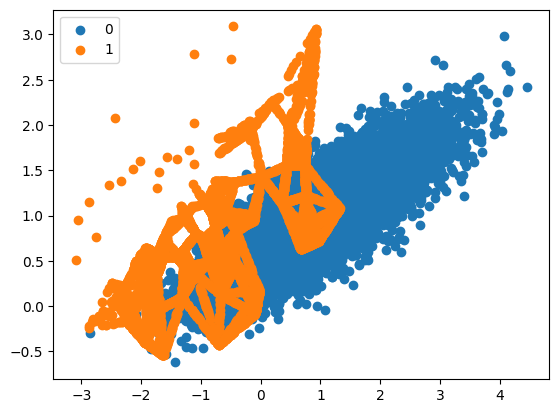

In [13]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###A scatter plot of the transformed dataset is created. Like Borderline-SMOTE, we can see that synthetic sample generation is **focused around the decision boundary as this region has the lowest density.**

###Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

###It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.